In [1]:
import sys
import logging
from uuid import UUID

import emission.core.get_database as edb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt
import emission.storage.timeseries.abstract_timeseries as esta

logging.getLogger().setLevel(logging.DEBUG)
logging.debug(sys.path)

iphone_ids = [UUID("079e0f1a-c440-3d7c-b0e7-de160f748e35"), UUID("c76a0487-7e5a-3b17-a449-47be666b36f6"), 
              UUID("c528bcd2-a88b-3e82-be62-ef4f2396967a"), UUID("95e70727-a04e-3e33-b7fe-34ab19194f8b")]
android_ids = [UUID("e471711e-bd14-3dbe-80b6-9c7d92ecc296"), UUID("fd7b4c2e-2c8b-3bfa-94f0-d1e3ecbd5fb7"),
               UUID("86842c35-da28-32ed-a90e-2da6663c5c73"), UUID("3bc0f91f-7660-34a2-b005-5c399598a369")]

In [2]:
list(edb.get_timeseries_db().find({"metadata.key": "config/sensor_config", "data.battery_status": {"$exists": True}}).sort("metadata.write_ts").limit(10))

[]

In [330]:
#type: list of emission.storage.timeseries.builtin_timeseries.BuiltinTimeSeries
iphone_ts = map(lambda u: esta.TimeSeries.get_time_series(u), iphone_ids)
android_ts = map(lambda u: esta.TimeSeries.get_time_series(u), android_ids)

In [331]:
#BuiltinTimeSeries.get_data_df(key, time_query = None, geo_query = None, extra_query_list=None) 
#type: list of DataFrame objects (regarding state info)
iphone_state_df = map(lambda t:t.get_data_df("statemachine/transition"), iphone_ts)
android_state_df = map(lambda t:t.get_data_df("statemachine/transition"), android_ts)

In [332]:
iphone_battery_df = map(lambda t:t.get_data_df("background/battery"), iphone_ts)
android_battery_df = map(lambda t:t.get_data_df("background/battery"), android_ts)

In [329]:
#state DataFrame for the ios.1
first_ios_state_df = iphone_state_df[0]
first_ios_state_df

,_id,curr_state,fmt_time,local_dt,metadata_write_ts,transition,ts
0,56ff6e031268798022721b86,2,2016-04-02T00:00:18.129835-07:00,2016-04-02 00:00:18.129,1.459580e+09,7,1.459580e+09
1,56ff7c141268798022721c84,2,2016-04-02T00:01:25.549302-07:00,2016-04-02 00:01:25.549,1.459580e+09,16,1.459580e+09
2,56ff7c151268798022721c86,2,2016-04-02T01:00:17.240728-07:00,2016-04-02 01:00:17.240,1.459584e+09,7,1.459584e+09
3,56ff8a1c1268798022721ce8,2,2016-04-02T01:01:29.213820-07:00,2016-04-02 01:01:29.213,1.459584e+09,16,1.459584e+09
4,56ff8a1c1268798022721cea,2,2016-04-02T02:00:10.163880-07:00,2016-04-02 02:00:10.163,1.459588e+09,7,1.459588e+09
5,56ff982e1268798022721d71,2,2016-04-02T02:01:18.403446-07:00,2016-04-02 02:01:18.403,1.459588e+09,16,1.459588e+09
6,56ff982f1268798022721d75,2,2016-04-02T03:00:10.831018-07:00,2016-04-02 03:00:10.831,1.459591e+09,7,1.459591e+09
7,56ffa63d126879802272496c,2,2016-04-02T03:01:21.928190-07:00,2016-04-02 03:01:21.928,1.459591e+09,16,1.459591e+09
8,56ffa63d126879802272496e,2,2016-04-02T04:00:11.444040-07:00,2016-04-02 04:00:11.444,1.459595e+09,7,1.459595e+09
9,56ffb44f12687980227249b9,2,2016-04-02T04:01:30.736010-07:00,2016-04-02 04:01:30.736,1.459595e+09,16,1.459595e+09


In [13]:
#battery DataFrame for the ios.1
first_ios_df = iphone_battery_df[0]
first_ios_df

,_id,battery_level_pct,battery_status,fmt_time,local_dt,metadata_write_ts,ts
0,56ff6e031268798022721b87,23.0,1,2016-04-02T00:00:18.144429-07:00,2016-04-02 00:00:18.144,1.459580e+09,1.459580e+09
1,56ff7c151268798022721c85,23.0,1,2016-04-02T00:01:25.579024-07:00,2016-04-02 00:01:25.579,1.459580e+09,1.459580e+09
2,56ff7c151268798022721c87,18.0,1,2016-04-02T01:00:17.290792-07:00,2016-04-02 01:00:17.290,1.459584e+09,1.459584e+09
3,56ff8a1c1268798022721ce9,18.0,1,2016-04-02T01:01:29.230781-07:00,2016-04-02 01:01:29.230,1.459584e+09,1.459584e+09
4,56ff8a1c1268798022721ceb,14.0,1,2016-04-02T02:00:10.180783-07:00,2016-04-02 02:00:10.180,1.459588e+09,1.459588e+09
5,56ff982e1268798022721d73,14.0,1,2016-04-02T02:01:18.432297-07:00,2016-04-02 02:01:18.432,1.459588e+09,1.459588e+09
6,56ff982f1268798022721d78,10.0,1,2016-04-02T03:00:10.854305-07:00,2016-04-02 03:00:10.854,1.459591e+09,1.459591e+09
7,56ffa63d126879802272496d,10.0,1,2016-04-02T03:01:21.952996-07:00,2016-04-02 03:01:21.952,1.459591e+09,1.459591e+09
8,56ffa63d126879802272496f,6.0,1,2016-04-02T04:00:11.461077-07:00,2016-04-02 04:00:11.461,1.459595e+09,1.459595e+09
9,56ffb44f12687980227249bb,6.0,1,2016-04-02T04:01:30.768046-07:00,2016-04-02 04:01:30.768,1.459595e+09,1.459595e+09


In [19]:
#battery DataFrame for the android.1
first_android_df = android_battery_df[0]
first_android_df

,_id,android_health,android_plugged,android_technology,android_temperature,android_voltage,battery_level_pct,battery_status,fmt_time,local_dt,metadata_write_ts,ts
0,56fff7c312687980227264d9,GOOD,UNKNOWN,Li-ion,236,236,21,1,2016-04-02T03:13:19.880000-07:00,2016-04-02 03:13:19.880,1.459592e+09,1.459592e+09
1,570021d6126879802272bac3,GOOD,AC,Li-ion,206,206,100,3,2016-04-02T09:48:30.731000-07:00,2016-04-02 09:48:30.731,1.459616e+09,1.459616e+09
2,570021d6126879802272bac4,GOOD,AC,Li-ion,212,212,100,3,2016-04-02T10:48:26.963000-07:00,2016-04-02 10:48:26.963,1.459619e+09,1.459619e+09
3,57002fe2126879802272bf7c,GOOD,AC,Li-ion,211,211,100,3,2016-04-02T12:47:47.086000-07:00,2016-04-02 12:47:47.086,1.459626e+09,1.459626e+09
4,57003df2126879802272c414,GOOD,AC,Li-ion,213,213,100,3,2016-04-02T13:47:44.585000-07:00,2016-04-02 13:47:44.585,1.459630e+09,1.459630e+09
5,57004c01126879802272c435,GOOD,AC,Li-ion,217,217,100,3,2016-04-02T14:47:44.297000-07:00,2016-04-02 14:47:44.297,1.459634e+09,1.459634e+09
6,57006822126879802272d28c,GOOD,AC,Li-ion,220,220,100,3,2016-04-02T15:47:44.247000-07:00,2016-04-02 15:47:44.247,1.459637e+09,1.459637e+09
7,5700882f126879802272e05b,GOOD,AC,Li-ion,224,224,100,3,2016-04-02T17:47:43.791000-07:00,2016-04-02 17:47:43.791,1.459644e+09,1.459644e+09
8,5700a299126879802272e6c6,GOOD,UNKNOWN,Li-ion,217,217,100,1,2016-04-02T20:04:32.421000-07:00,2016-04-02 20:04:32.421,1.459653e+09,1.459653e+09
9,5700dd08126879802272ea13,GOOD,UNKNOWN,Li-ion,210,210,99,1,2016-04-02T21:57:13.080000-07:00,2016-04-02 21:57:13.080,1.459659e+09,1.459659e+09


About to plot 0
About to plot 1
About to plot 2
About to plot 3


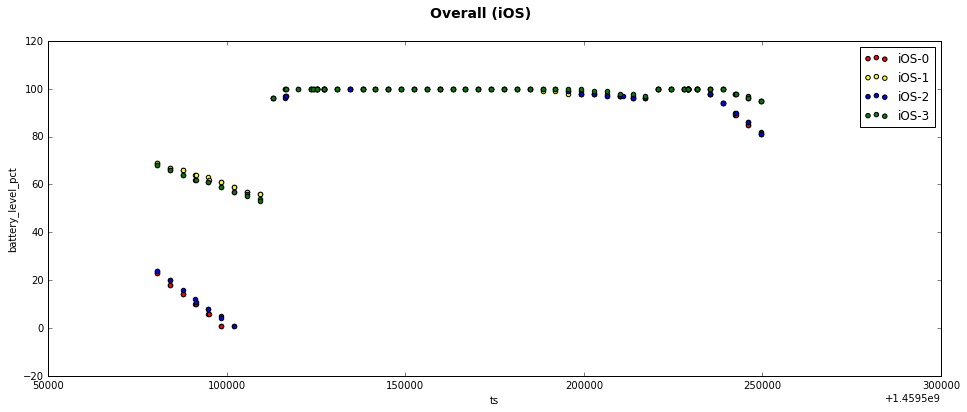

In [333]:
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d
color = ['red', 'yellow', 'blue', 'green']
ifig.suptitle('Overall (iOS)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_df):
    print "About to plot %d" % i
    #df.plot(x='local_dt', y='battery_level_pct', ax=iaxes, label="phone-%s" % i)
    df.plot(x='ts', y='battery_level_pct', kind='scatter', ax=iaxes, label="iOS-%s" % i, color=color[i])
    #iaxes[i].set_xlabel('time')
    #iaxes[i].set_ylabel('batery_level')

About to plot 0
About to plot 1
About to plot 2
About to plot 3


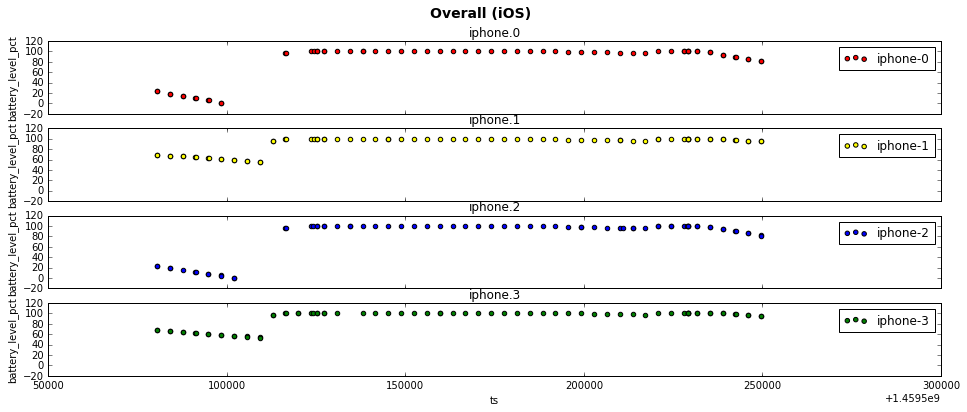

In [334]:
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=4, sharex=True, sharey=True, figsize=(16,6))
aaxes = aaxes2d.flatten()

afig.suptitle('Overall (iOS)', fontsize=14, fontweight='bold')

for i, df in enumerate(iphone_battery_df):
    print "About to plot %d" % i
    #df.plot(x='local_dt', y='battery_level_pct', ax=aaxes[i], title="iphone.%s" % i, label="phone-%s" % i)
    df.plot(x='ts', y='battery_level_pct', kind='scatter', ax=aaxes[i], title="iphone.%s" % i, label="iphone-%s" % i, color=color[i])

About to plot 0
About to plot 1
About to plot 2
About to plot 3


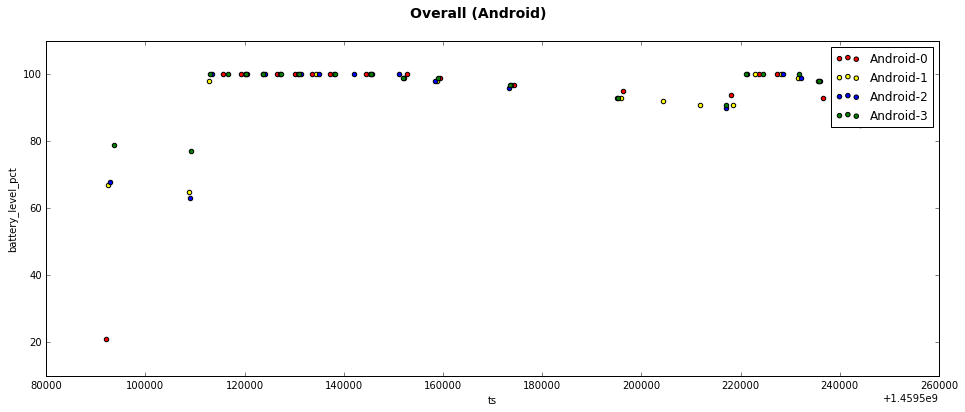

In [335]:
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
aaxes = aaxes2d

color = ['red', 'yellow', 'blue', 'green']
afig.suptitle('Overall (Android)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_df):
    print "About to plot %d" % i
    #df.plot(x='local_dt', y='battery_level_pct', ax=iaxes, label="phone-%s" % i)
    df.plot(x='ts', y='battery_level_pct', kind='scatter', ax=aaxes, label="Android-%s" % i, color=color[i])
    #iaxes[i].set_xlabel('time')
    #iaxes[i].set_ylabel('batery_level')

About to plot 0
About to plot 1
About to plot 2
About to plot 3


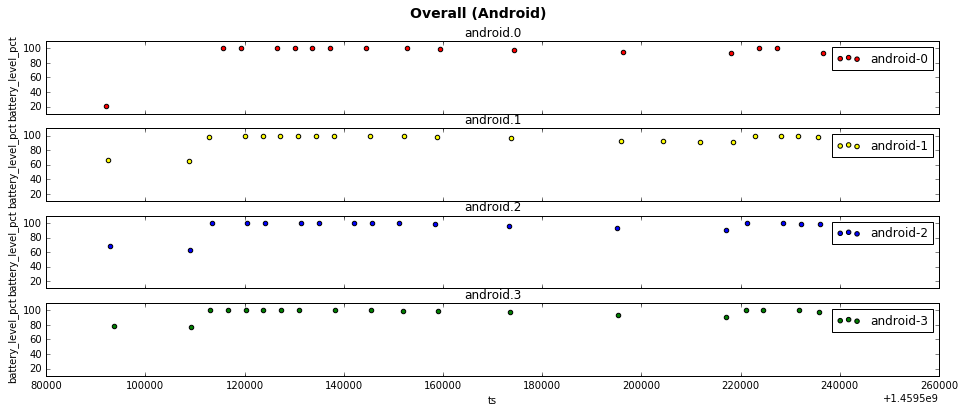

In [339]:
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=4, sharex=True, sharey=True, figsize=(16,6))
aaxes = aaxes2d.flatten()

afig.suptitle('Overall (Android)', fontsize=14, fontweight='bold')

for i, df in enumerate(android_battery_df):
    print "About to plot %d" % i
    #df.plot(x='local_dt', y='battery_level_pct', ax=aaxes[i], title="android.%s" % i, label="phone-%s" % i)
    df.plot(x='ts', y='battery_level_pct', kind='scatter', ax=aaxes[i], title="android.%s" % i, label="android-%s" % i, color=color[i])


In [337]:
def get_combined_df(sensor_df, ranges_df):
    #sensor_df = df for battery info
    #ranges_df = df for state info
    
    #find start_ts & end_ts for the period when state=3=tracking_stopped
    tracking_stopped_df = ranges_df[ranges_df.curr_state == 3]
    tracking_stopped_df.reset_index(inplace=True)
    start_ts = tracking_stopped_df.iloc[0].ts
    end_ts = tracking_stopped_df.iloc[-1].ts

    print 'start_ts = ' +str(start_ts)  
    print 'end_ts = ' +str(end_ts) 
    
    combined_df_parts = sensor_df[(sensor_df.ts >= start_ts) & (sensor_df.ts <= end_ts) 
                                  & ((sensor_df.battery_status == 1) )]
    #return combined_df_parts.battery_level_pct
    return combined_df_parts

    # combined_df = pd.concat(combined_df_parts)
    # print combined_df[["ts", "fmt_time", "battery_level_pct", "battery_status"]]
    #return filter(lambda df: len(df) > 1, combined_df_parts)

In [291]:
battery_df = pd.DataFrame({'battery_status': [0, 1, 3, 1, 0],
                         'ts': [2.5, 3, 3.5, 4, 4.1],
                         'battery_level_pct': [100, 1, 1, 1, 100]})
battery_df

,battery_level_pct,battery_status,ts
0,100,0,2.5
1,1,1,3.0
2,1,3,3.5
3,1,1,4.0
4,100,0,4.1


In [292]:
state_df = pd.DataFrame({'curr_state': [1, 2, 3, 3, 2, 1],
                     'ts': [1, 2, 3, 4, 5, 6]})
state_df

,curr_state,ts
0,1,1
1,2,2
2,3,3
3,3,4
4,2,5
5,1,6


In [293]:
r = get_combined_df(battery_df, state_df)
#r
print r

start_ts = 3
end_ts = 4
   battery_level_pct  battery_status   ts
1                  1               1  3.0
3                  1               1  4.0


In [294]:
#type(r.battery_level)

In [295]:
def get_combined_df_list(battery_df_list, state_df_list):
    battery_state_df_list = []
    for i in range(0,4)
        battery_state_df_list.append(get_combined_df(battery_df_list[i], state_df_list[i]))
    return battery_state_df_list

start_ts = 1459627211.62
end_ts = 1459729109.93
start_ts = 1459627211.11
end_ts = 1459729141.47
start_ts = 1459627211.53
end_ts = 1459729178.92
start_ts = 1459627213.03
end_ts = 1459729204.4
<class 'pandas.core.frame.DataFrame'>
21
<class 'pandas.core.frame.DataFrame'>
23
<class 'pandas.core.frame.DataFrame'>
24
<class 'pandas.core.frame.DataFrame'>
23
[[ 1.          0.95087683  0.97497724  0.9681897 ]
 [ 0.95087683  1.          0.97151743  0.87704908]
 [ 0.97497724  0.97151743  1.          0.91637959]
 [ 0.9681897   0.87704908  0.91637959  1.        ]]
            ts  battery_level_pct
0   29192904.0              100.0
1   29192976.0              100.0
2   29193048.0              100.0
3   29193120.0              100.0
4   29193192.0              100.0
5   29193264.0              100.0
6   29193336.0              100.0
7   29193408.0              100.0
8   29193480.0              100.0
9   29193552.0              100.0
10  29193624.0              100.0
11  29193696.0              100.

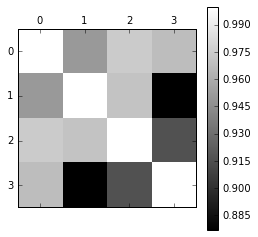

In [317]:
#-------Correlation Analysis "iOS"-------#
import numpy as np

combined_series_list = get_combined_df_list(iphone_battery_df, iphone_state_df)
combined_series_list = map(lambda df: df[["ts", "battery_level_pct"]], combined_series_list)
#combined_series_list = map(lambda df: df.ts = df.ts-1, combined_series_list)


#combined_series_list = map(lambda df: df[0:30], combined_series_list)

#for l in combined_series_list:
#    print len(l.index)
#    print "======"
#    print l

for l in combined_series_list:
    print type(l)
    print len(l.index)
    for index, item in l.ts.iteritems():
        l.ts.loc[index] = int(item/50)

#for l in combined_series_list:
#    print l
#    print "======="

#combined_series_list --> 4 dataframes of (ts, battery_level_pct) for 4 phones

l1 = pd.merge(combined_series_list[0], combined_series_list[1], on='ts', how='inner')
l2 = pd.merge(combined_series_list[2], combined_series_list[3], on='ts', how='inner')
l3 = pd.merge(l1, l2, on='ts', how='inner')

#print l3

list = []
list.append(l3.iloc[:,1])
list.append(l3.iloc[:,2])
list.append(l3.iloc[:,3])
list.append(l3.iloc[:,4])

#print list #4 series of battery levels for 4 phones

print np.corrcoef(list)
plt.matshow(np.corrcoef(list), cmap=plt.cm.gray)
plt.colorbar()



phone = []
for i in range(0,4):
    temp_df = pd.concat([l3.iloc[:,0], l3.iloc[:,i+1]], axis=1)
    temp_df.columns = ['ts', 'battery_level_pct']
    phone.append(temp_df)
print phone[0]
print type(phone[0])
print type(phone)        

About to plot 0
About to plot 1
About to plot 2
About to plot 3


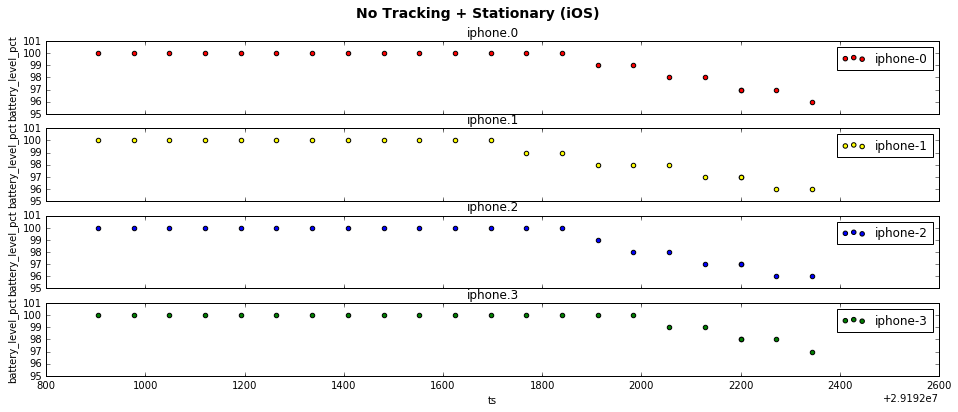

In [318]:
(afig, aaxes2d) = plt.subplots(ncols=1, nrows=4, sharex=True, sharey=True, figsize=(16,6))
aaxes = aaxes2d.flatten()

afig.suptitle('No Tracking + Stationary (iOS)', fontsize=14, fontweight='bold')

for i, df in enumerate(phone):
    print "About to plot %d" % i
    #df.plot(x='local_dt', y='battery_level_pct', ax=aaxes[i], title="iphone.%s" % i, label="phone-%s" % i)
    df.plot(x='ts', y='battery_level_pct', kind='scatter', ax=aaxes[i], title="iphone.%s" % i, label="iphone-%s" % i, color=color[i])

About to plot 0
About to plot 1
About to plot 2
About to plot 3


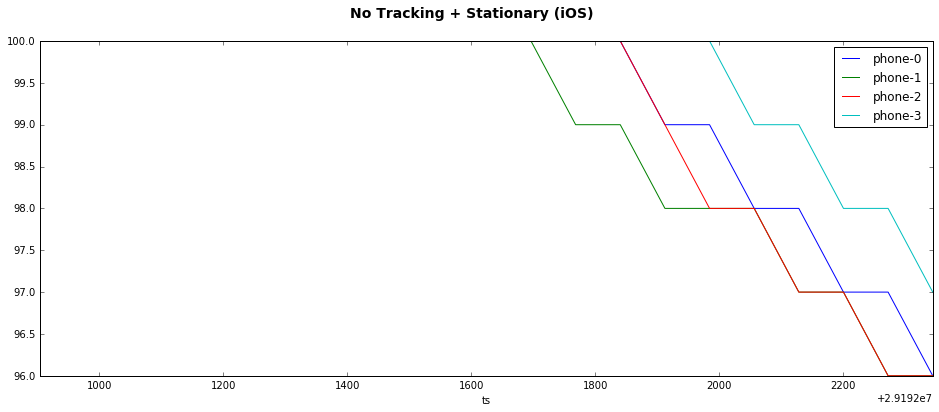

In [321]:
(ifig, iaxes2d) = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
iaxes = iaxes2d
color = ['red', 'yellow', 'blue', 'green']
ifig.suptitle('No Tracking + Stationary (iOS)', fontsize=14, fontweight='bold')

for i, df in enumerate(phone):
    print "About to plot %d" % i
    df.plot(x='ts', y='battery_level_pct', ax=iaxes, label="phone-%s" % i)
    #df.plot(x='ts', y='battery_level_pct', kind='scatter', ax=iaxes, label="iOS-%s" % i, color=color[i])
    #iaxes[i].set_xlabel('time')
    #iaxes[i].set_ylabel('batery_level')

In [297]:
#-------Correlation Analysis "TEMPLATE"-------#

import numpy as np

for key, df in regime_grouped_ranges_df:
    if key[0] == 'stationary' and key[1] == 'tracking-off':
        #print "For key %s, ranges_df %s " % (key, df)
        #print(type(df)) #pandas.core.frame.DataFrame
        #print(type(iphone_battery_df[0])) #pandas.core.frame.DataFrame
        print(df)
        print('===============================================')
        print(iphone_battery_df[0])
        combined_df_list = get_combined_df_list(iphone_battery_df, df)
        #print(type(combined_df_list[0][0])) #pandas.core.frame.DataFrame
        concat_df_list = map(lambda rl: pd.concat(rl).battery_level_pct, combined_df_list)
        #print(type(concat_df_list[0])) #pandas.core.series.Series
        filtered_concat_df_list = map(lambda cdf: cdf[pd.notnull(cdf)], concat_df_list)
        df_list = map(lambda df: df[0:21], filtered_concat_df_list)
        filtered_lengths = map(lambda rl: len(rl), filtered_concat_df_list)
        print "after dropping, lengths are %s" % filtered_lengths
        min_length = min(filtered_lengths)
        if min_length == 0:
            print "One of the phones has no data for this time period, no point in comparing"
        elif min_length != filtered_lengths[0]:
            print "Data does not line up, skipping"
        else:
            #print np.corrcoef(filtered_concat_df_list)
            print np.corrcoef(df_list)
            print (type(df_list[0])) #pandas.core.series.Series
            #plt.matshow(np.corrcoef(filtered_concat_df_list), cmap=plt.cm.gray)
            plt.matshow(np.corrcoef(df_list), cmap=plt.cm.gray)
            plt.colorbar()

NameError: name 'regime_grouped_ranges_df' is not defined

start_ts = 1459627211.62
end_ts = 1459729109.93
start_ts = 1459627211.11
end_ts = 1459729141.47
start_ts = 1459627211.53
end_ts = 1459729178.92
start_ts = 1459627213.03
end_ts = 1459729204.4
<class 'pandas.core.frame.DataFrame'>
5
<class 'pandas.core.frame.DataFrame'>
7
<class 'pandas.core.frame.DataFrame'>
6
<class 'pandas.core.frame.DataFrame'>
6
            ts  battery_level_pct
8   14596526.0                100
9   14596594.0                 99
10  14596743.0                 97
11  14596962.0                 95
12  14597181.0                 94
            ts  battery_level_pct
9   14596452.0                100
10  14596521.0                 99
11  14596588.0                 98
12  14596737.0                 97
13  14596958.0                 93
14  14597042.0                 92
15  14597117.0                 91
            ts  battery_level_pct
8   14596457.0                100
9   14596510.0                100
10  14596584.0                 98
11  14596733.0                 96
12 

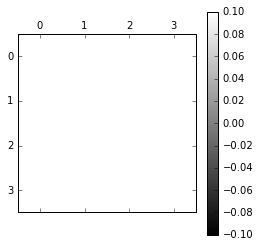

In [327]:
#-------Correlation Analysis "iOS"-------#
import numpy as np

combined_series_list = get_combined_df_list(android_battery_df, iphone_state_df)
combined_series_list = map(lambda df: df[["ts", "battery_level_pct"]], combined_series_list)
#combined_series_list = map(lambda df: df.ts = df.ts-1, combined_series_list)


#combined_series_list = map(lambda df: df[0:30], combined_series_list)

#for l in combined_series_list:
#    print len(l.index)
#    print "======"
#    print l

for l in combined_series_list:
    print type(l)
    print len(l.index)
    #print l
    for index, item in l.ts.iteritems():
        l.ts.loc[index] = int(item/100)

for l in combined_series_list:
    print l
#    print "======="

#combined_series_list --> 4 dataframes of (ts, battery_level_pct) for 4 phones

l1 = pd.merge(combined_series_list[0], combined_series_list[1], on='ts', how='inner')
l2 = pd.merge(combined_series_list[2], combined_series_list[3], on='ts', how='inner')
l3 = pd.merge(l1, l2, on='ts', how='inner')

#print l3

list = []
list.append(l3.iloc[:,1])
list.append(l3.iloc[:,2])
list.append(l3.iloc[:,3])
list.append(l3.iloc[:,4])

#print list #4 series of battery levels for 4 phones

print np.corrcoef(list)
plt.matshow(np.corrcoef(list), cmap=plt.cm.gray)
plt.colorbar()



phone = []
for i in range(0,4):
    temp_df = pd.concat([l3.iloc[:,0], l3.iloc[:,i+1]], axis=1)
    temp_df.columns = ['ts', 'battery_level_pct']
    phone.append(temp_df)
print phone[0]
print type(phone[0])
print type(phone)        